In [1]:
import numpy as np
import matplotlib.pyplot as plt

from branchcut.exampleCreator import createExample, createUnwrappedBaseline, TrueBranchCuts
from branchcut.unwrap import *
from branchcut.setup import find_residues, create_mask
from branchcut.branchCut import branch_cut

In [40]:
len(phase[0])

2

0 0
1 0
2 0
3 0
0 1
1 1
2 1
3 1


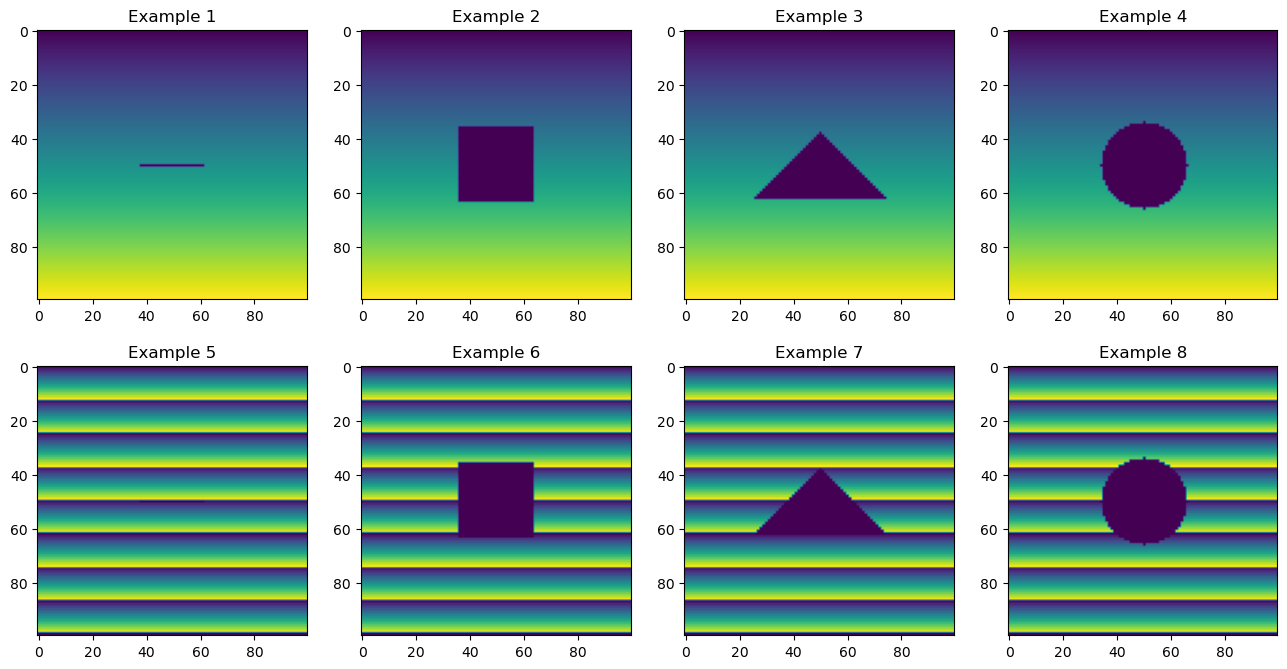

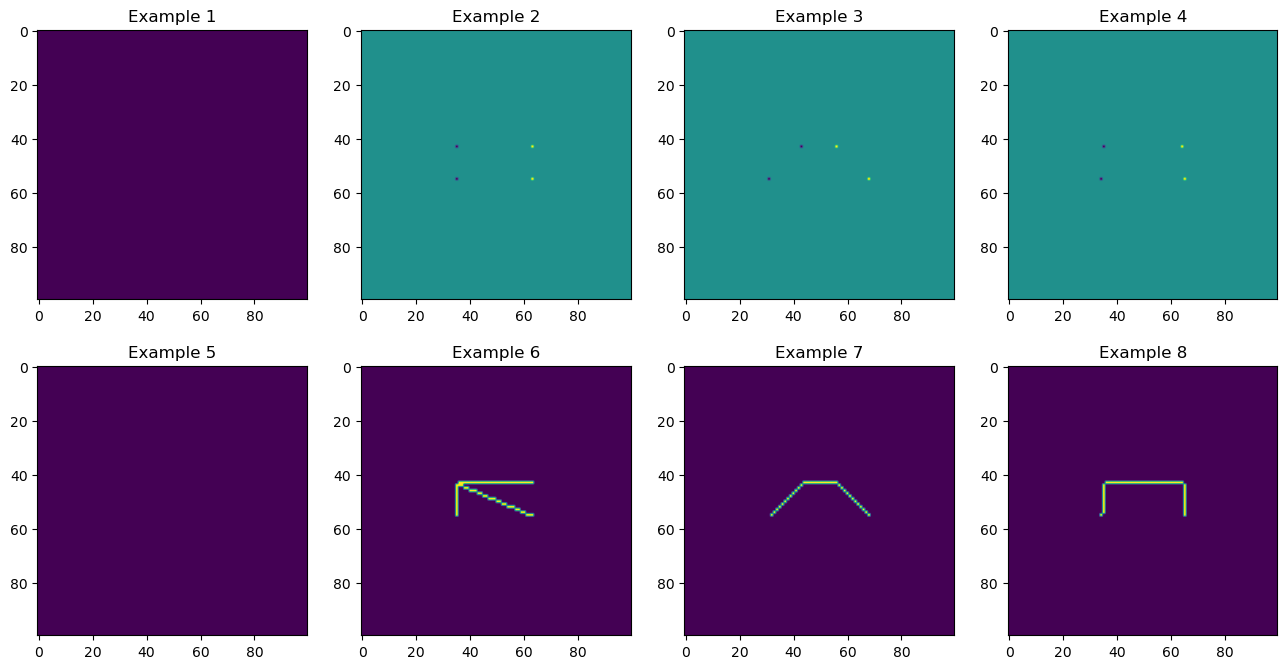

In [ ]:
save = False
SIZE = (100,100)
minmax = [(0,1*2*np.pi),
          (0,2*2*np.pi),
          (0,4*2*np.pi),
          (0,8*2*np.pi),
]

phase_baseline = createUnwrappedBaseline(SIZE, minmax[3], format='vertical')
phase_baseline_2 = createUnwrappedBaseline(SIZE, minmax[0], format='vertical')

scale = 0 # np.ones(SIZE)*8*np.pi

mask = [create_mask(SIZE,loc=[50,25], shape='line', percent=False),
        create_mask(SIZE,loc=[50,50], shape='square', percent=False),
        create_mask(SIZE,loc=[50,50], shape='triangle', percent=False),
        create_mask(SIZE,loc=[50,50], shape='circle', percent=False),
]

shape = ['line',
         'square',
         'triangle',
         'circle',
]

phase = []
residue = []
for vshape, vmask in zip(shape, mask):
    add = vmask * (scale - phase_baseline)
    phase.append(createExample(phase_baseline, add_image=add, add_first=True))
    residue.append(find_residues(phase[-1][1]))
    if save:
        np.save( f"data/example_data/wrapped_phase_{vshape}_example",phase[-1][1])
        np.save( f"data/example_data/unwrapped_phase_{vshape}_example",phase[-1][1])


fig, axs = plt.subplots(2,4, figsize=(16,8))
i = 0
for ax in axs.flatten(): 
    ax.set_title(f'Example {i+1}')
    ax.imshow(phase[i%4][i//4])
    i += 1

l_branchcut = []
for vres in residue:
    l_branchcut.append(branch_cut(vres))

fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(4):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(residue[i])

for i in range(4,8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(l_branchcut[i-4])


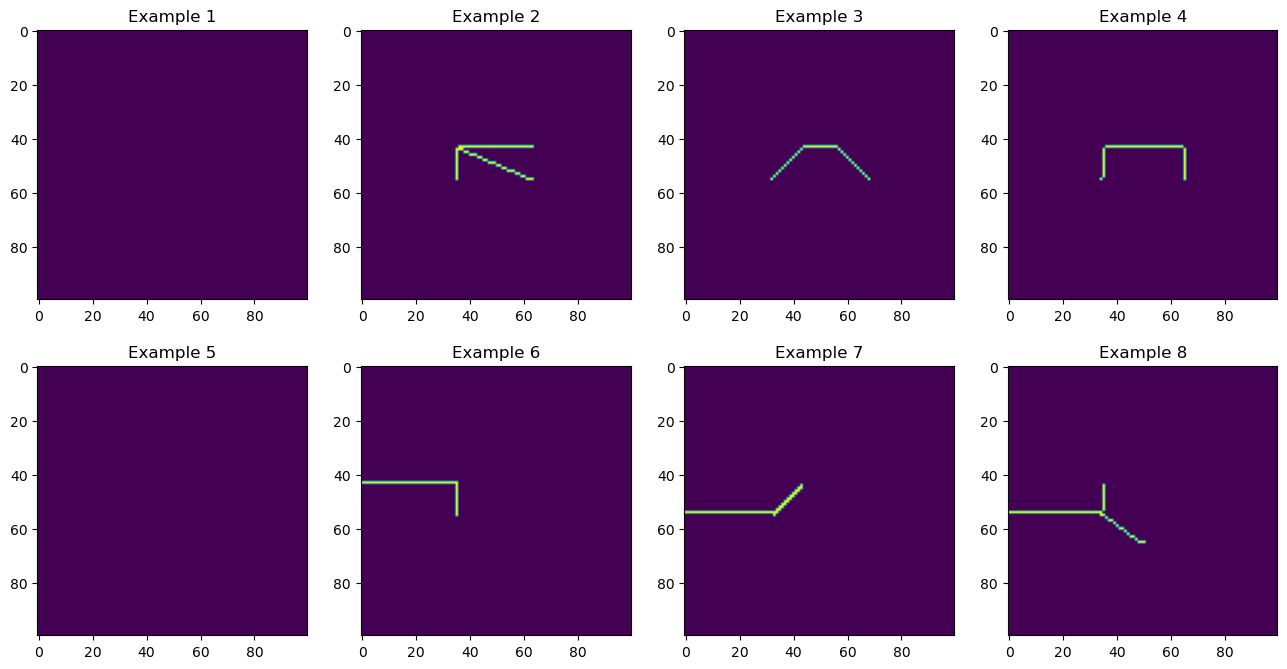

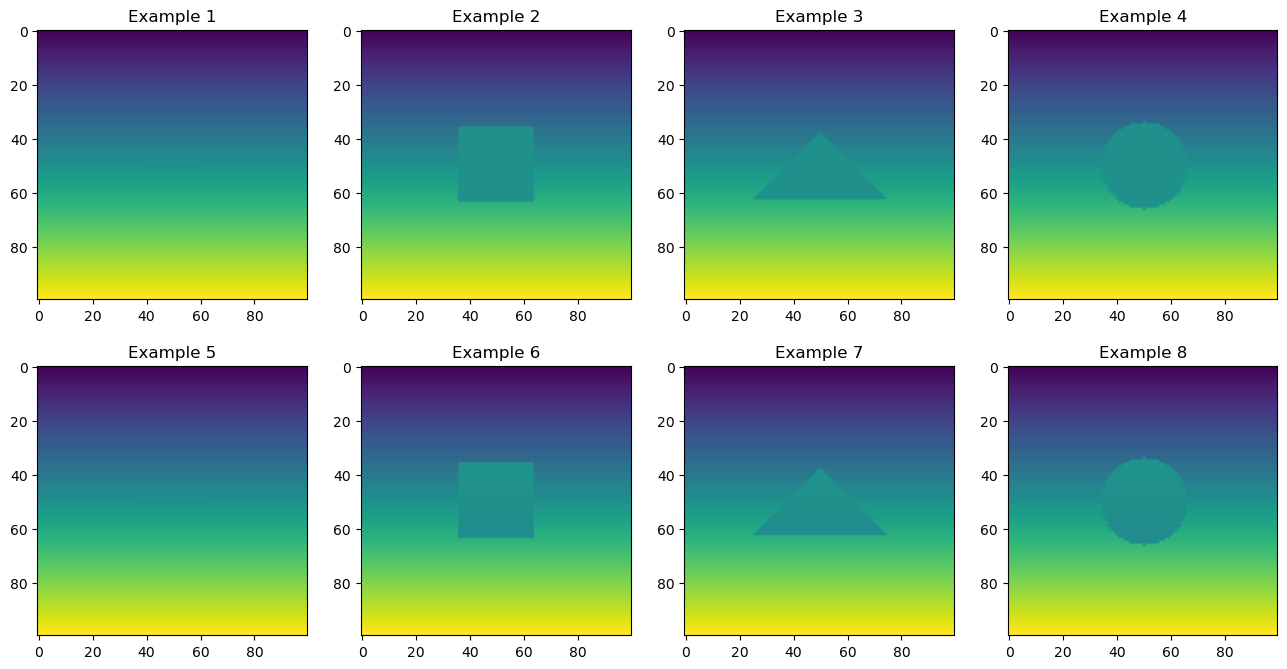

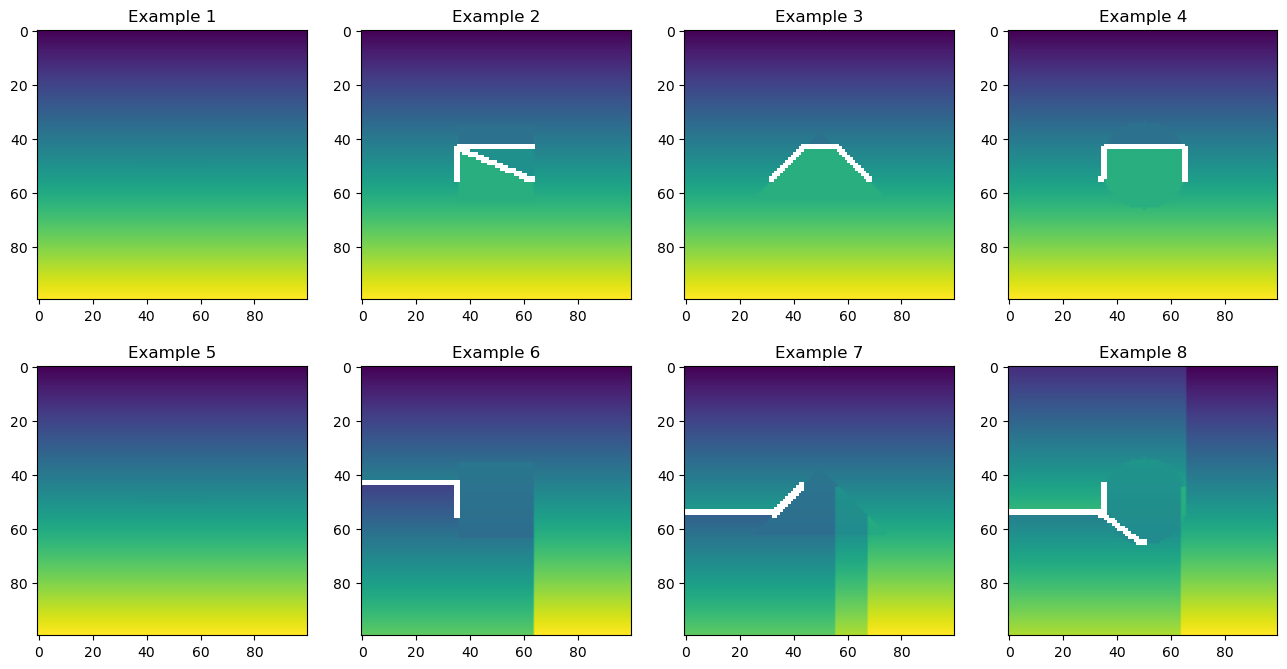

In [49]:
unwrapped_from_branchcut = []
for vphase, vbranchcut in zip(phase, l_branchcut):
    unwrapped_from_branchcut.append(unwrap(phase=vphase[1],
                                    seed=(0,99),
                                    branchCuts=vbranchcut,
                                    mode="dfs",
                                    unwrapBranchPixels=False,
                                    ))

fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(phase[i][0])

fig, ax = plt.subplots(2,4, figsize=(16,8))
for i in range(8):
    pax = ax.flatten()[i]
    pax.set_title(f'Example {i+1}')
    pax.imshow(unwrapped_from_branchcut[i])

In [ ]:
earthquake = np.fromfile('data/Bam_earthquake/20031203_20040211.cut.pha', dtype='>f4')
earthquake = earthquake.reshape(2065, 1959)

earthquake_res = find_residues(earthquake)
earthquake_bc = branch_cut(earthquake_res)
earthquake_unwrap = unwrap(phase=earthquake,
                           seed=(1750,250),
                           branchCuts=earthquake_bc,
                           mode="dfs",
                           unwrapBranchPixels=True,
                           )

earthquake_unwrap = unwrap(phase=earthquake,
                           seed=(1750,250),
                           branchCuts=earthquake_bc,
                           mode="bfs",
                           unwrapBranchPixels=True,
                           )

In [23]:
earthquakeGold = np.fromfile('data/Bam_earthquake/20031203_20040211.cut.pha.gold', dtype='>f4')
earthquakeGold = earthquakeGold.reshape(2065, 1959)

earthquakeGold_res = find_residues(earthquakeGold)
earthquakeGold_bc = branch_cut(earthquakeGold_res)
earthquakeGold_unwrap = unwrap(phase=earthquakeGold,
                           seed=(1750,250),
                           branchCuts=earthquakeGold_bc,
                           mode="dfs",
                           unwrapBranchPixels=True,
                           )

earthquakeGold_unwrap = unwrap(phase=earthquakeGold,
                           seed=(1750,250),
                           branchCuts=earthquakeGold_bc,
                           mode="bfs",
                           unwrapBranchPixels=True,
                           )

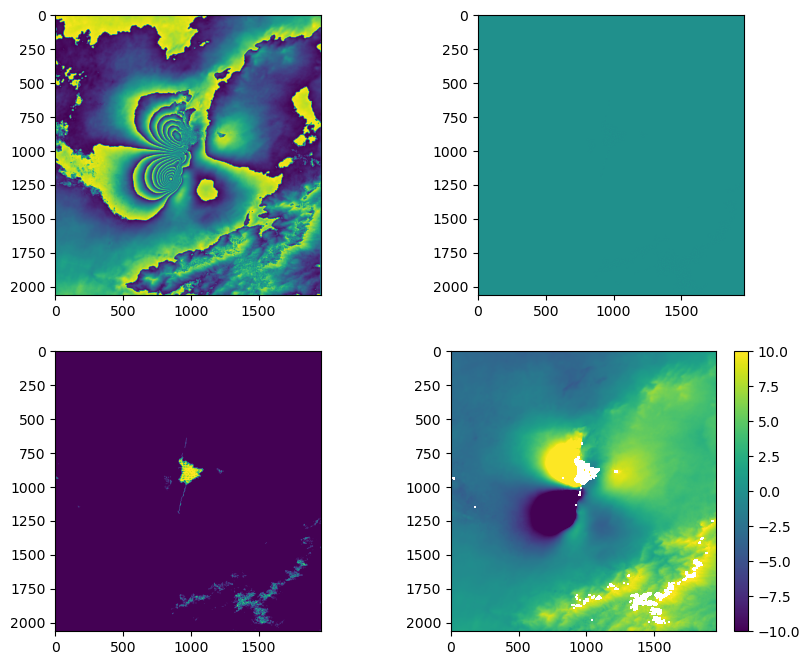

In [27]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
ax[0].imshow(earthquakeGold)

ax[1].imshow(earthquakeGold_res)

ax[2].imshow(earthquakeGold_bc)

im = ax[3].imshow(earthquakeGold_unwrap, vmin =-10, vmax=10)
fig.colorbar(im)

